<a href="https://colab.research.google.com/github/MoneyforNotn/Strategy-bt-opt-notes/blob/main/5MinScalpingBACKTEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#5 min Scapling VWAP


#COMPLETE BACKTEST + OPTIMIZATION

https://www.youtube.com/watch?v=RbQaARxEW9o

In [ ]:
#previous 15 candles must close above the vwap curve for long trades, oposite for short trades
#set bollinger bands (lenght 14, std 2)
#price must close below lower bollinger band for long position
#RSI for confirmation (RSI <45 buy signal, rsi>55 sell), if this all is true enter trade

#SL = a x ATR  (7 or 8)
#TP = Ratio x SL (ratio to be coded, atr, a, also parameters to be changed)
# so far the best optimizer
# SL atr = 1.3
# tpslr = 1.9

In [ ]:
import sys
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [ ]:
import numpy as np
print(np.__version__)

1.23.5


In [ ]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-ta 0.3.14b0 requires numpy==1.26.4, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incom

In [ ]:
!pip install -U git+https://github.com/twopirllc/pandas-ta
import pandas_ta as ta

import pandas as pd
#df=pd.read_csv("AAPL_5M_BID_2024-2025.csv")
df=pd.read_csv("EURUSD_Candlestick_5_M_ASK_30.09.2019-30.09.2022.csv")
df

  Cloning https://github.com/twopirllc/pandas-ta to /tmp/pip-req-build-nmwix3x7
  Running command git clone --filter=blob:none --quiet https://github.com/twopirllc/pandas-ta /tmp/pip-req-build-nmwix3x7
  Resolved https://github.com/twopirllc/pandas-ta to commit b465491f226d9e07fffd4e59cd0affc9284521ca
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


,Gmt time,Open,High,Low,Close,Volume
0,30.09.2019 00:00:00.000,1.09425,1.09426,1.09405,1.09406,585.10
1,30.09.2019 00:05:00.000,1.09408,1.09414,1.09401,1.09409,289.39
2,30.09.2019 00:10:00.000,1.09410,1.09423,1.09408,1.09410,276.24
3,30.09.2019 00:15:00.000,1.09409,1.09410,1.09388,1.09389,439.29
4,30.09.2019 00:20:00.000,1.09390,1.09395,1.09388,1.09395,341.23
...,...,...,...,...,...,...
225081,30.09.2022 20:35:00.000,0.98028,0.98034,0.98001,0.98022,624.12
225082,30.09.2022 20:40:00.000,0.98023,0.98047,0.98007,0.98030,408.20
225083,30.09.2022 20:45:00.000,0.98026,0.98034,0.98019,0.98031,317.29
225084,30.09.2022 20:50:00.000,0.98031,0.98067,0.97987,0.97999,1472.13


In [ ]:
print(df.columns)

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [ ]:
df["Gmt time"]=df["Gmt time"].str.replace(".000","")
df["Gmt time"]=pd.to_datetime(df["Gmt time"],format='%d.%m.%Y %H:%M:%S')
df.set_index("Gmt time",inplace=True)
df=df[df.High!=df.Low] #discarting days where low=high (no movement)
len(df)

# df["Date"] = df["Date"].str.replace(r"-0\d:00$", "", regex=True)
# df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# df.set_index("Date",inplace=True)
# df=df[df.High!=df.Low] #discarting days where low=high (no movement)
# len(df)

# df["Datetime"]=df["Datetime"].str.replace(r"-0\d:00$", "", regex=True)
# df["Datetime"]=pd.to_datetime(df["Datetime"],format='%Y-%m-%d %H:%M:%S')
# df.set_index("Datetime",inplace=True)
# df=df[df.High!=df.Low] #discarting days where low=high (no movement)
# len(df)

# #dukascopy
# df["Local time"] = df["Local time"].str.replace(r"-0\d:00$", "", regex=True) # Remove timezone offsets
# df["Local time"] = df["Local time"].str.replace(".000", "", regex=True)  # Remove ".000"

# #The problem is that the format is inconsistent, with some strings having 'GMT-0500'
# #at the end. We will split the string at the first space character to get the portion we need
# df["Local time"] = df["Local time"].str.split(' ').str[0]
# df["Local time"] = pd.to_datetime(df["Local time"], format='%d.%m.%Y% H:%M:%S') # Now this should work
# df.set_index("Local time", inplace=True)
# df = df[df.High != df.Low]  # Discarding days where low=high (no movement)
# len(df)

224989

In [ ]:
df["VWAP"]=ta.vwap(df.High,df.Low,df.Close,df.Volume, offset=25)
df["RSI"]=ta.rsi(df.Close,length=16)#16
my_bbands=ta.bbands(df.Close,length=14,std=2)#14
df=df.join(my_bbands)
df.dropna(inplace=True)

<ipython-input-3-a22a33853f46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VWAP"]=ta.vwap(df.High,df.Low,df.Close,df.Volume, offset=25)
<ipython-input-3-a22a33853f46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RSI"]=ta.rsi(df.Close,length=16)#16


In [ ]:
VWAPsignal = [0]*len(df)
backcandles = 15 #defval 15

#from comments
df['Max_Open_Close'] = df[['Open','Close']].max(axis=1)
df['Min_Open_Close'] = df[['Open','Close']].min(axis=1)
df['upt'] = 1
df['dnt'] = 1
df.loc[(df['Max_Open_Close'] >= df['VWAP']), 'dnt'] = 0
df.loc[(df['Min_Open_Close'] <= df['VWAP']), 'upt'] = 0
df['sig_dnt'] = df['dnt'].rolling(backcandles + 1, min_periods=1).min()
df['sig_upt'] = df['upt'].rolling(backcandles + 1, min_periods=1).min()
df['VWAPSignal'] = 0
df.loc[(df['sig_upt'] == 1) & (df['sig_dnt'] == 1), 'VWAPSignal'] = 3
df.loc[(df['sig_upt'] == 1) & (df['sig_dnt'] == 0), 'VWAPSignal'] = 2
df.loc[(df['sig_upt'] == 0) & (df['sig_dnt'] == 1), 'VWAPSignal'] = 1

In [ ]:
# VWAPsignal = [0]*len(df)
# backcandles = 15

# for row in range(backcandles,len(df)):
#   upt = 1
#   dnt = 1
#   for i in range(row-backcandles,row+1):
#      if max(df.Open[i], df.Close[i]) >=df.VWAP[i]:
#            dnt = 0
#      if min(df.Open[i], df.Close[i]) <=df.VWAP[i]:
#             upt = 0
#   if upt == 1 and dnt == 1:
#         VWAPsignal[row] = 3
#   elif upt == 1:
#         VWAPsignal[row] = 2
#   elif dnt == 1:
#         VWAPsignal[row] = 1

# df['VWAPSignal'] = VWAPsignal


In [ ]:
def calculate_total_signal(l):
    if (df.VWAPSignal[l]==2
        and df.Close[l]<=df['BBL_14_2.0'][l]
        and df.RSI[l]<45):#45
        return 2
    if (df.VWAPSignal[l]==1
        and df.Close[l]>=df['BBU_14_2.0'][l]
        and df.RSI[l]>55):
        return 1
    else:
        return 0

total_signals = [0]*len(df) # Changed variable name to avoid conflict
for row in range(backcandles,len(df)):
    total_signals[row] = calculate_total_signal(row) # Call the function using the new name
df['TotalSignal'] = total_signals # Assign the list to the DataFrame column
# TotalSignal = [0]*len(df)
# for row in range(backcandles,len(df)):
#     TotalSignal[row] = TotalSignal(row)
# df['TotalSignal'] = TotalSignal

<ipython-input-5-c0bb2b99399f>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (df.VWAPSignal[l]==2
<ipython-input-5-c0bb2b99399f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (df.VWAPSignal[l]==1
<ipython-input-5-c0bb2b99399f>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and df.Close[l]>=df['BBU_14_2.0'][l]
<ipython-input-5-c0bb2b99399f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. I

In [ ]:
df[df.TotalSignal!=0].count()
#2781 in video

,0
Open,4456
High,4456
Low,4456
Close,4456
Volume,4456
VWAP,4456
RSI,4456
BBL_14_2.0,4456
BBM_14_2.0,4456
BBU_14_2.0,4456


In [ ]:
import numpy as np
def pointposbreak(x):
  if x['TotalSignal']==1:
    return x['High']+1e-4
  elif x['TotalSignal']==2:
    return x['Low']-1e-4
  else:
    return np.nan

df['pointposbreak']=df.apply(lambda row: pointposbreak(row) ,axis=1)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=10400
dfpl=df[st:st+350]
dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close']),
                go.Scatter(x=dfpl.index, y=dfpl.VWAP,#['VWAP']
                           line=dict(color='blue', width=1), name='VWAP'),
                go.Scatter(x=dfpl.index, y=dfpl['BBL_14_2.0'],line=dict(color='green',width=1),name="BBL"), # Added comma here
                go.Scatter(x=dfpl.index, y=dfpl['BBU_14_2.0'],line=dict(color='green',width=1),name="BBU")]) # Added comma here

fig.add_scatter(x=dfpl.index, y=dfpl['pointposbreak'], mode="markers", marker=dict(color="MediumPurple", size=5),name="Signal")
#fig.show()

In [ ]:
dfpl=df[:225000].copy()
import pandas_ta as ta
dfpl["ATR"]=ta.atr(dfpl.High, dfpl.Low, dfpl.Close, length=7)
#help(ta.atr)
def SIGNAL():
    return dfpl.TotalSignal

In [ ]:
!pip install backtesting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.4/191.4 kB 11.1 MB/s eta 0:00:00


In [ ]:
# from backtesting import Strategy
# from backtesting import Backtest

# class MyStrategy(Strategy):
#     initsize = 0.99
#     mysize = initsize
#     def init(self):
#         super().init()
#         self.signal = self.I(SIGNAL)

#     def next(self):
#         super().next()
#         slatr = 1.2*self.data.ATR[-1]
#         TPSLRatio = 1.5

#         if len(self.trades)>0:
#           if self.trades[-1].is_long and self.data.RSI[-1]>=90:
#             self.trades[-1].close()
#           elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
#             self.trades[-1].close()

#           if self.signal1==2 and len(self.trades)==0:
#               sl1=self.data.Close[-1]-slatr
#               tp1=self.data.Close[-1]+slatr*TPSLRatio
#               self.buy(sl=sl1,tp=tp1,size=self.mysize)

#           elif self.signal1==1 and len(self.trades)==0:
#               sl1=self.data.Close[-1]+slatr
#               tp1=self.data.Close[-1]-slatr*TPSLRatio
#               self.sell(sl=sl1,tp=tp1,size=self.mysize)

# bt = Backtest(dfpl, MyStrategy, cash=10000, margin=1/10, commission=0.00)
# stat=bt.run()
# stat

In [ ]:
from backtesting import Strategy, Backtest



class MyStrategy(Strategy):
    initsize = 0.99
    mysize = initsize
    x = 1.2  # Define slatr as a class variable
    y = 1.5  # Define TPSLRatio as a class variable
#ATR = 7

    def init(self):
        super().init()
        self.signal = self.I(SIGNAL)  # Ensure SIGNAL is defined externally

    def next(self):
        super().next()
        slatr = self.x * self.data.ATR[-1]  # Stop-loss ATR calculation
        TPSLRatio = self.y

        # Ensure signal1 is correctly referenced
        signal1 = self.signal[-1]

        # Check if there's an open trade and close based on RSI conditions
        if len(self.trades) > 0:
            last_trade = self.trades[-1]  # Get the last active trade

            if last_trade.is_long and self.data.RSI[-1] >= 90:
                last_trade.close()
            elif last_trade.is_short and self.data.RSI[-1] <= 10:
                last_trade.close()

        # Entry conditions: only trade when there are no open positions
        if len(self.trades) == 0:
            if signal1 == 2:
                sl1 = self.data.Close[-1] - slatr
                tp1 = self.data.Close[-1] + slatr * TPSLRatio
                self.buy(sl=sl1, tp=tp1, size=self.mysize)

            elif signal1 == 1:
                sl1 = self.data.Close[-1] + slatr
                tp1 = self.data.Close[-1] - slatr * TPSLRatio
                self.sell(sl=sl1, tp=tp1, size=self.mysize)

# Running the backtest
bt = Backtest(dfpl, MyStrategy, cash=10000, margin=1/10, commission=0.00)
stat = bt.run()
stat



/usr/local/lib/python3.11/dist-packages/backtesting/_plotting.py:55: UserWarning:

Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.



Backtest.run:   0%|          | 0/224963 [00:00<?, ?bar/s]

,0
Start,2019-09-30 02:05:00
End,2022-09-30 20:55:00
Duration,1096 days 18:50:00
Exposure Time [%],10.100727
Equity Final [$],48739.575712
Equity Peak [$],52497.57254
Return [%],387.395757
Buy & Hold Return [%],-10.352459
Return (Ann.) [%],52.43618
Volatility (Ann.) [%],29.009521


In [ ]:
bt.plot()

<ipython-input-171-5ae8d19b00ab>:1: UserWarning:

Superimposed OHLC plot matches the original plot. Skipping.



GridPlot(id='p2913', ...)

Run the 2nd optimizer

In [ ]:
# stats = bt.optimize(
#     x=np.arange(0.6, 1.7, 0.1).tolist(),  # Optimize stop-loss ATR multiplier from 1 to 4
#     maximize="Sharpe Ratio",  # Maximize Sharpe Ratio instead of final equity
#     constraint=lambda p: p.x >= 0.5  # Ensure stop-loss multiplier is at least 1
# )
# stats

In [ ]:
stats['_strategy']

<Strategy MyStrategy(x=0.7)>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Backtest.optimize:   0%|          | 0/80 [00:00<?, ?it/s]

Backtest.run:   0%|          | 0/224963 [00:00<?, ?bar/s]

Start                     2019-09-30 02:05:00
End                       2022-09-30 20:55:00
Duration                   1096 days 18:50:00
Exposure Time [%]                    18.66654
Equity Final [$]                  49592.39813
Equity Peak [$]                   53560.94905
Return [%]                          395.92398
Buy & Hold Return [%]               -10.35246
Return (Ann.) [%]                    53.25286
Volatility (Ann.) [%]                 37.3603
CAGR [%]                             44.47088
Sharpe Ratio                          1.42539
Sortino Ratio                         3.82164
Calmar Ratio                          1.98127
Alpha [%]                           395.02557
Beta                                 -0.08678
Max. Drawdown [%]                   -26.87815
Avg. Drawdown [%]                    -0.88368
Max. Drawdown Duration      300 days 22:55:00
Avg. Drawdown Duration        2 days 02:04:00
# Trades                                 2859
Win Rate [%]                      

/usr/local/lib/python3.11/dist-packages/backtesting/_plotting.py:141: UserWarning:

Data contains too many candlesticks to plot; downsampling to '4h'. See `Backtest.plot(resample=...)`



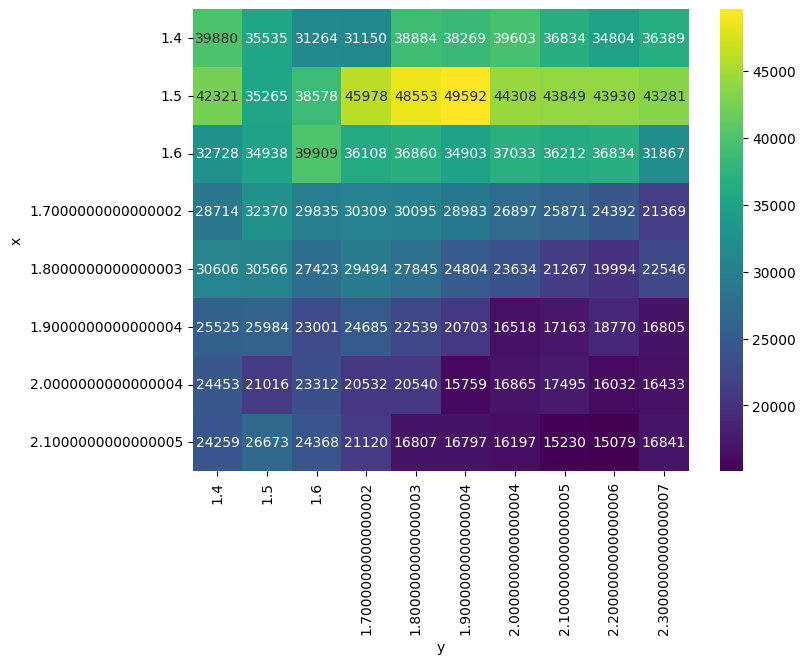

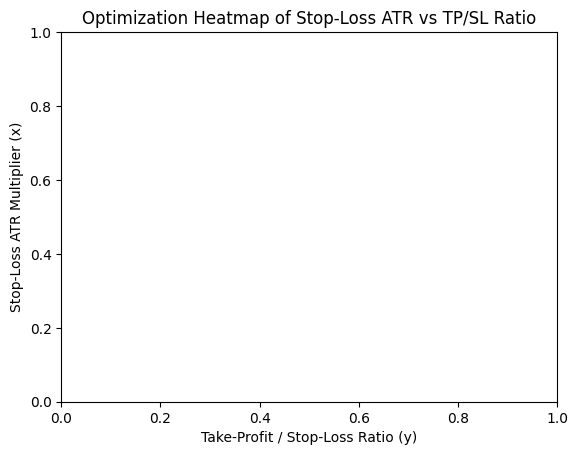

In [ ]:
stats, heatmap = bt.optimize(
    x=np.arange(1.4, 2.1, 0.1).tolist(),  # Testing different Stop-Loss ATR multipliers
    y=np.arange(1.4, 2.4, 0.1).tolist(),  # Testing different Take-Profit/Stop-Loss Ratios
    #x=np.arange(0.9, 1.2, 0.1).tolist(),  # Testing different Stop-Loss ATR multipliers
    #y=np.arange(1.4, 1.7, 0.1).tolist(),
    maximize="Equity Final [$]",  # Optimize for highest final equity
    #maximize="Sharpe Ratio",  # Maximize Sharpe Ratio instead of final equity
  #  constraint=lambda p: p.y>p.x,  # Ensure logical values
    return_heatmap=True  # Return the heatmap for further analysis
  )

print(stats)
bt.plot()

import seaborn as sns
import matplotlib.pyplot as plt


heatmap_df = heatmap.unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".0f", cmap="viridis")
plt.show()

# df_results = pd.DataFrame([{k: v for k, v in vars(stats._strategy).items() if k != '_equity_curve'}])

# # Pivot the data for heatmap
# heatmap_data = df_results.pivot(index='x', columns='y')

# # Plot the heatmap
# plt.figure(figsize=(8,6))
# sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)

plt.title("Optimization Heatmap of Stop-Loss ATR vs TP/SL Ratio")
plt.xlabel("Take-Profit / Stop-Loss Ratio (y)")
plt.ylabel("Stop-Loss ATR Multiplier (x)")
plt.show()


# # Create a dictionary to store the optimization results
# heatmap_data_dict = {'x': [], 'y': [], 'Equity Final [$]': []}

# # Iterate through the optimization results grid
# for x in stats._strategy.params['x'].unique():  # Get unique x values
#     for y in stats._strategy.params['y'].unique():  # Get unique y values
#         # Filter the results for the current (x, y) combination
#         filtered_stats = stats._strategy.params[(stats._strategy.params['x'] == x) & (stats._strategy.params['y'] == y)]

#         # Extract the desired metric (e.g., 'Equity Final [$]')
#         equity_final = filtered_stats['Equity Final [$]'].iloc[0]

#         # Append the data to the dictionary
#         heatmap_data_dict['x'].append(x)
#         heatmap_data_dict['y'].append(y)
#         heatmap_data_dict['Equity Final [$]'].append(equity_final)

# # Convert the dictionary to a DataFrame
# heatmap_data = pd.DataFrame(heatmap_data_dict).pivot(index='x', columns='y', values='Equity Final [$]')

# # Plot the heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
# plt.title("Optimization Heatmap of Stop-Loss ATR vs TP/SL Ratio")
# plt.xlabel("Take-Profit / Stop-Loss Ratio (y)")
# plt.ylabel("Stop-Loss ATR Multiplier (x)")
# plt.show()

In [ ]:
stats['_strategy']

<Strategy MyStrategy(x=1.5,y=1.9000000000000004)>